   ## Bike Sharing Assignment

### Problem Statement:
     
     Consider a bike sharing company that has a data set containing bike demands across the american market.
     
     Essentially the company wants:
     
       1. which variables are significant in predicting the demand for shared bikes.
       2. How well those variables describe the bike demands.

### Step 1: Reading and Understanding the Data

In [1]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')
#Adding required imports
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#reading the data
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# getting the shape of data set in order to know rows and columns
bike.shape

(730, 16)

In [4]:
# data set info to view the details and any missing values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see that data has no missing or null values so we no need to handle them.

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Remove unnecessary columns
 we can see the column instant is some id ,
 dteday has date but we hve month and year columns so we can drop dteday,
 casual and registered columns has count which again adds in cnt column so we can drop those two columns.

In [6]:
bike = bike.drop(['instant','dteday','casual','registered'],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
bike.shape

(730, 12)

### Step 2: Visualising the Data

In [8]:
# importing matplotlib and seaborn for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

##### Visualising Numerical Variables using pair plot

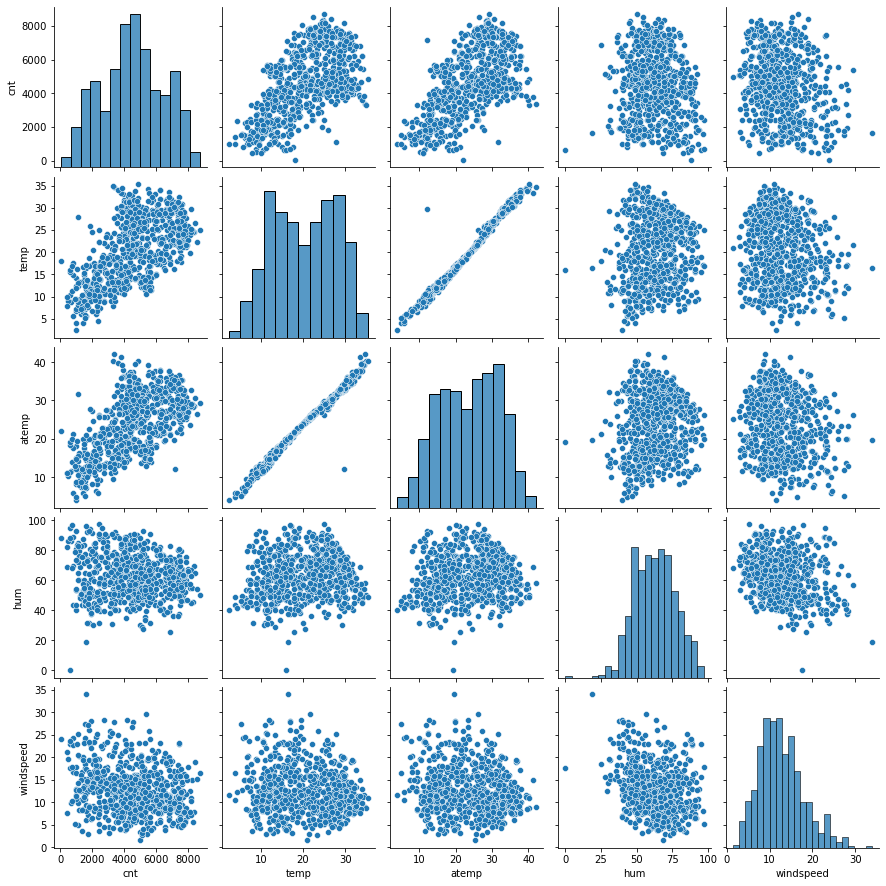

<Figure size 2880x1440 with 0 Axes>

In [68]:
sns.pairplot(data = bike,vars = ['cnt','temp','atemp','hum','windspeed'])
plt.figure(figsize=(40,20))
plt.show()

From the above pair plot we can see that there is a linear relation ship between temp,atemp and cnt

#### Visualising the categorical variables using box plots

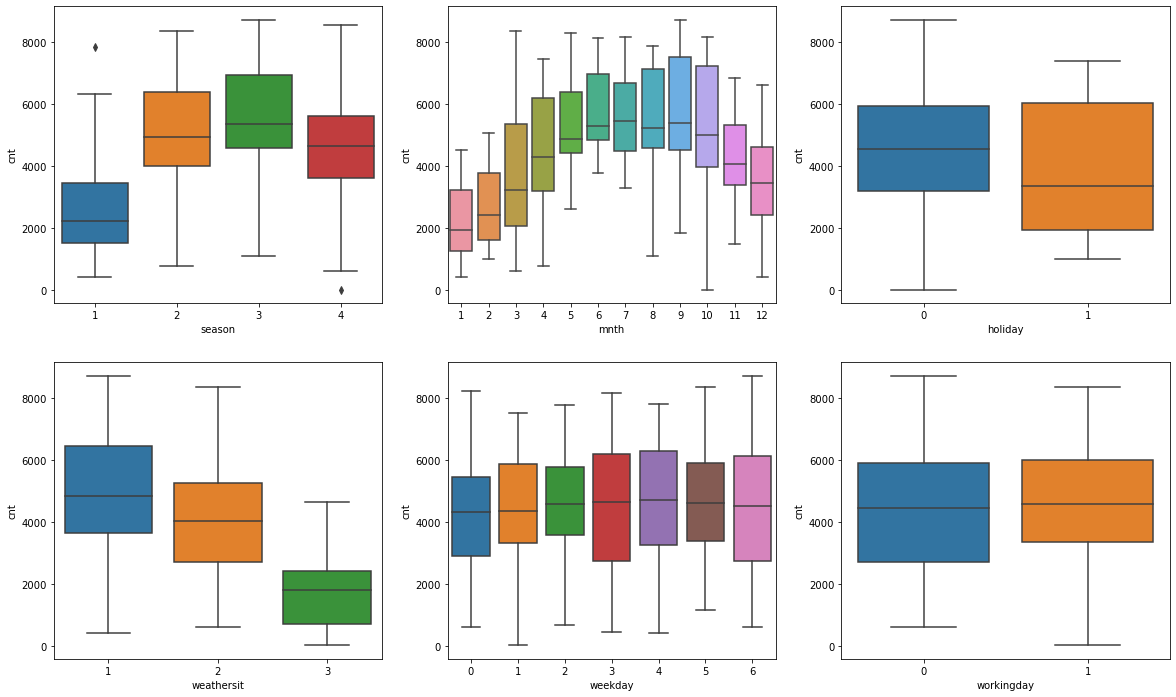

In [10]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x ='season',y = 'cnt',data = bike)
plt.subplot(2,3,2)
sns.boxplot(x ='mnth',y = 'cnt',data = bike)
plt.subplot(2,3,3)
sns.boxplot(x ='holiday',y = 'cnt',data = bike)
plt.subplot(2,3,4)
sns.boxplot(x ='weathersit',y = 'cnt',data = bike)
plt.subplot(2,3,5)
sns.boxplot(x ='weekday',y = 'cnt',data = bike)
plt.subplot(2,3,6)
sns.boxplot(x ='workingday',y = 'cnt',data = bike)
plt.show()

From the above box plots  we can see that :
 1. season 3 i.e., fall has more demand in bikes
 2. on holiday has more demand
 3. when the weather is clear then the demand is more


### Step 3 : Data Preparation

#### Dummy Variables

Creating dummy variables for category variables such as mnth,weekday,season,weathersit for other variables not required because of having 0 and 1 

In [11]:
# creating dummies
mnth = pd.get_dummies(bike['mnth'],prefix='mnth',drop_first=True)
weekday = pd.get_dummies(bike['weekday'],prefix='week',drop_first=True)
season = pd.get_dummies(bike['season'],prefix='sea',drop_first=True)
weathersit = pd.get_dummies(bike['weathersit'],prefix='wea',drop_first=True)

In [12]:
bike = pd.concat([bike,mnth,weekday,season,weathersit],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,week_1,week_2,week_3,week_4,week_5,week_6,sea_2,sea_3,sea_4,wea_2,wea_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
#dropping original columns
bike.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike.shape

(730, 30)

In [14]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,week_1,week_2,week_3,week_4,week_5,week_6,sea_2,sea_3,sea_4,wea_2,wea_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Step 4 : Splitting the data into Training Set and Testing Set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# splitting 70 percent as training data and 30 percent as testing data
np.random.seed(0)
bike_train,bike_test = train_test_split(bike,train_size = 0.7,test_size = 0.3,random_state = 100)

#### Scaling the features

For scaling we will use Min-Max Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler 

In [18]:
scaler = MinMaxScaler()

In [19]:
# applying scaler to the columns except categorical variables
num_vars = ['temp','atemp','cnt','hum','windspeed']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [20]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,week_1,week_2,week_3,week_4,week_5,week_6,sea_2,sea_3,sea_4,wea_2,wea_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


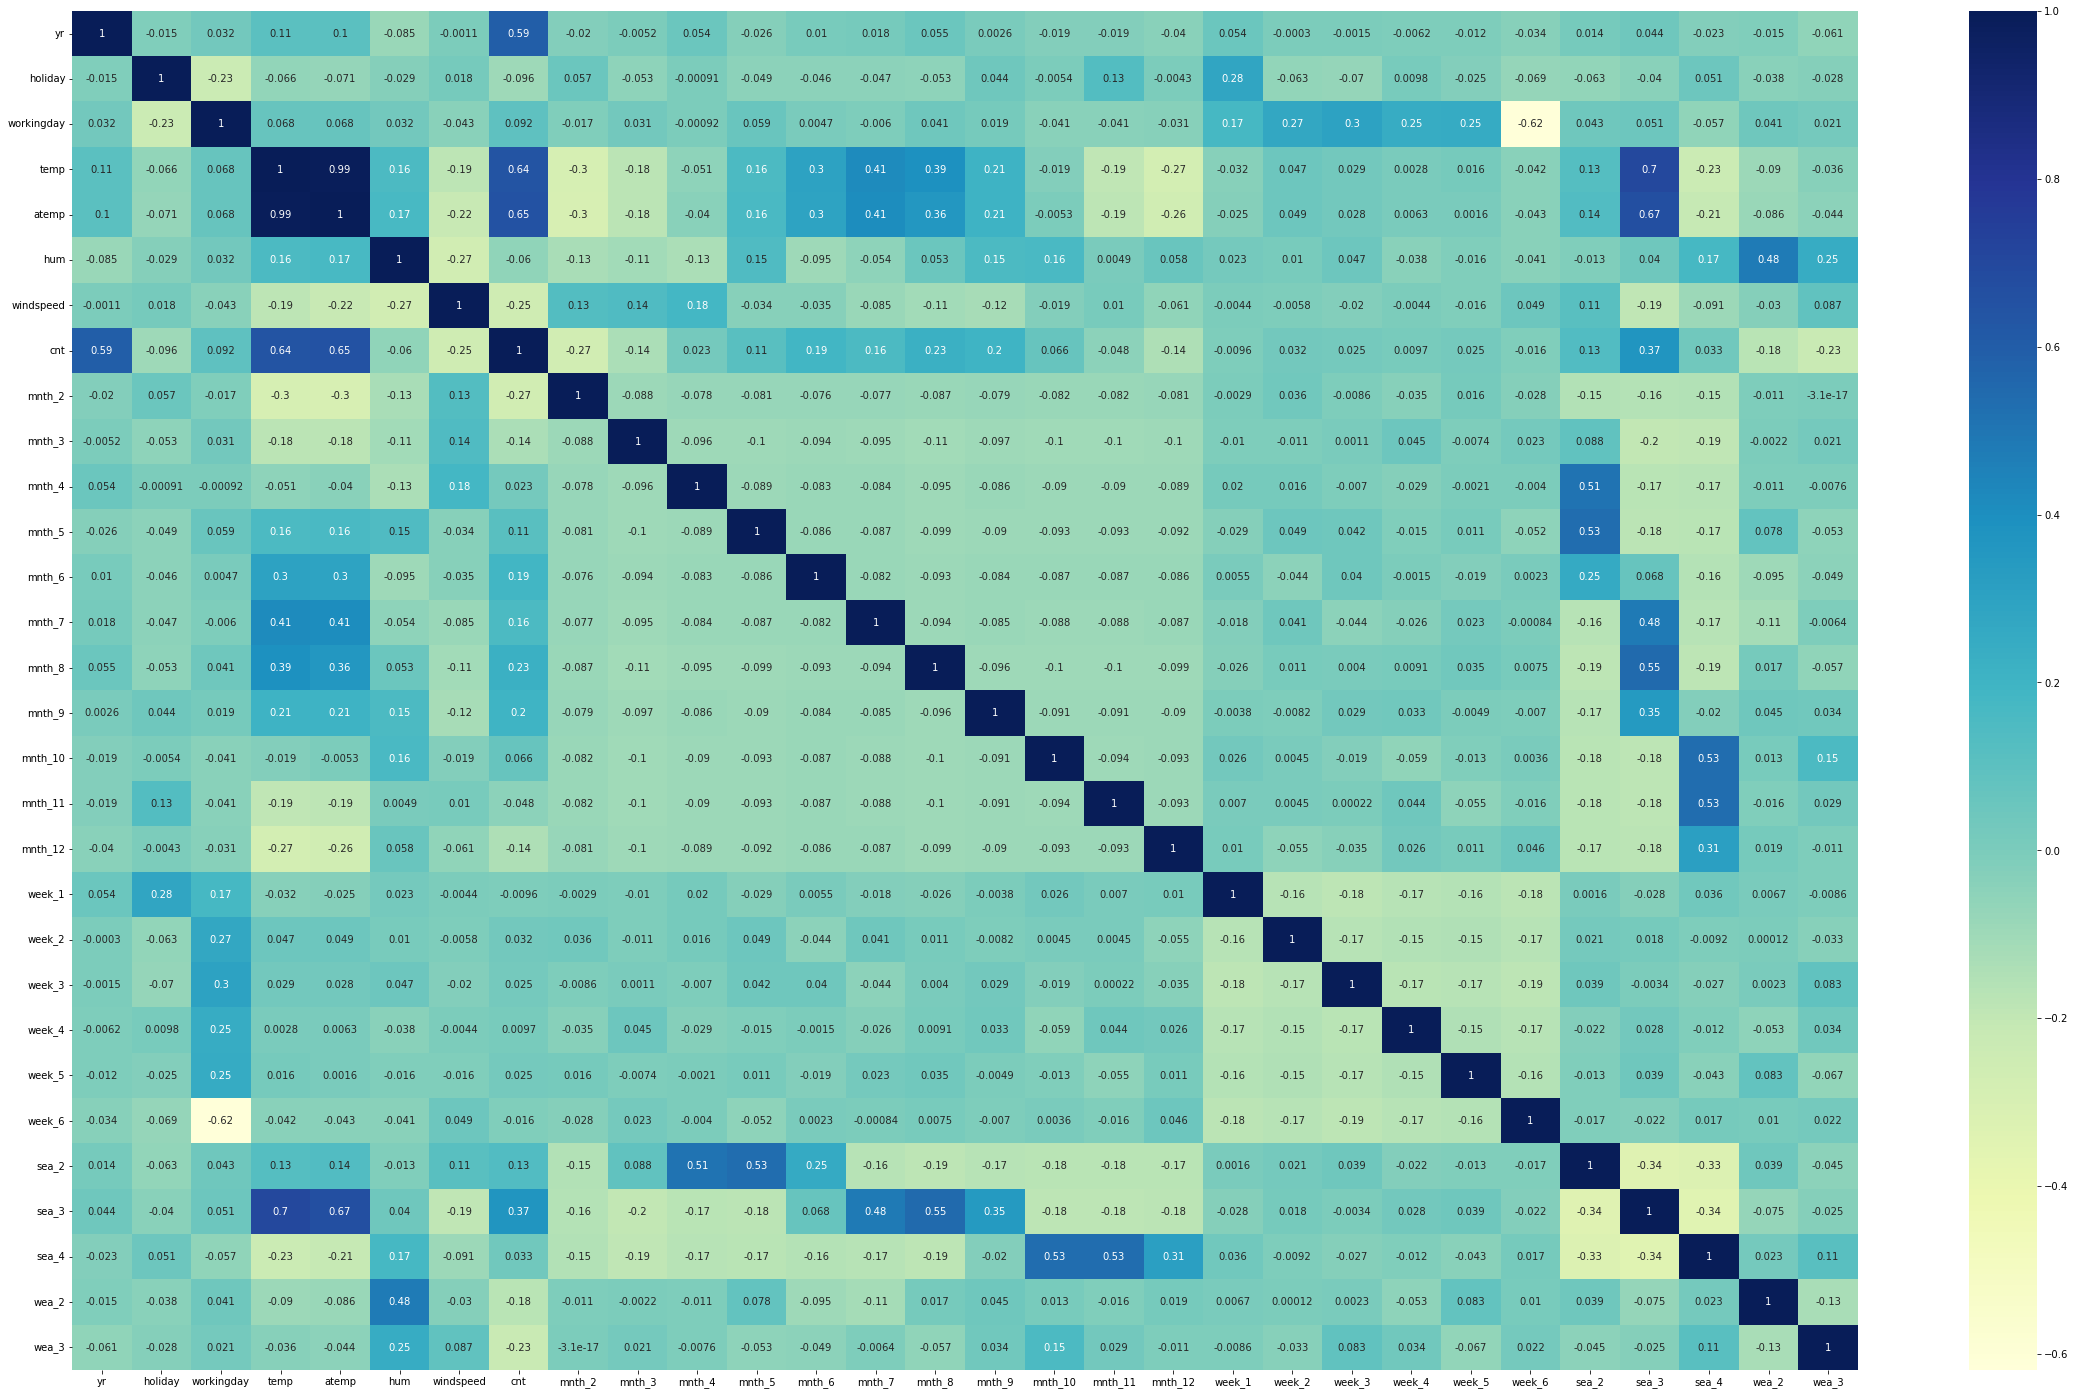

In [21]:
#checking the coeffcients to see the correlations using heat map
plt.figure(figsize = (40,25))
sns.heatmap(bike_train.corr(),annot=True,cmap = "YlGnBu")
plt.show()

We can see that yr,temp,atemp and season 3 are correlated with cnt

#### Dividing into X and Y sets for model building

In [22]:
y_train = bike_train.pop('cnt')
x_train = bike_train

### Step 5: Building a Linear Model

We will use the RFE(Recursive Feature Elimination) from Scikit learn 

In [23]:
#importing RFE from scikit 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(x_train,y_train)

In [25]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 8),
 ('mnth_4', False, 10),
 ('mnth_5', False, 9),
 ('mnth_6', False, 11),
 ('mnth_7', False, 15),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('week_1', True, 1),
 ('week_2', True, 1),
 ('week_3', True, 1),
 ('week_4', True, 1),
 ('week_5', True, 1),
 ('week_6', False, 3),
 ('sea_2', True, 1),
 ('sea_3', False, 7),
 ('sea_4', True, 1),
 ('wea_2', False, 2),
 ('wea_3', True, 1)]

In [26]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_9', 'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'sea_2', 'sea_4', 'wea_3'], dtype='object')

In [27]:
x_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'week_6', 'sea_3', 'wea_2'], dtype='object')

#### Building model using stats model

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [29]:
x_train_rfe = x_train[col]

In [30]:
vif = pd.DataFrame()
vif['features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending = False)
print(vif)

      features    VIF
1      holiday    inf
2   workingday    inf
7       week_1    inf
8       week_2    inf
9       week_3    inf
10      week_4    inf
11      week_5    inf
4          hum  10.94
3         temp   7.20
5    windspeed   3.58
0           yr   2.03
13       sea_4   1.64
12       sea_2   1.58
6       mnth_9   1.21
14       wea_3   1.10


In [31]:
x_lm = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_lm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.30e-181
Time:                        16:11:15   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -954.9
Df Residuals:                     495   BIC:                            -891.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2579      0.027      9.559      0.0

### Model 1

Dropping week_5 based on high p_value and high VIF value

In [32]:
x_train_new = x_train_rfe.drop(['week_5'],axis=1)

In [33]:
vif = pd.DataFrame()
vif['features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending = False)
print(vif)

      features    VIF
4          hum  10.94
2   workingday   7.44
3         temp   7.20
5    windspeed   3.58
7       week_1   2.29
9       week_3   2.27
10      week_4   2.06
8       week_2   2.04
0           yr   2.03
12       sea_4   1.64
11       sea_2   1.58
1      holiday   1.37
6       mnth_9   1.21
13       wea_3   1.10


In [34]:
x_train_lm1 = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train,x_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.30e-181
Time:                        16:11:15   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -954.9
Df Residuals:                     495   BIC:                            -891.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2579      0.027      9.559      0.0

### Model 2

Dropping hum based on high VIF value

In [35]:
x_train_new = x_train_new.drop(['hum'],axis=1)

In [36]:
vif = pd.DataFrame()
vif['features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending = False)
print(vif)

      features   VIF
2   workingday  7.15
3         temp  4.29
4    windspeed  3.15
6       week_1  2.29
8       week_3  2.27
9       week_4  2.06
7       week_2  2.04
0           yr  2.02
10       sea_2  1.56
11       sea_4  1.37
1      holiday  1.36
5       mnth_9  1.20
12       wea_3  1.07


In [37]:
x_train_lm2 = sm.add_constant(x_train_new)
lr2 = sm.OLS(y_train,x_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     157.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.26e-166
Time:                        16:11:15   Log-Likelihood:                 455.50
No. Observations:                 510   AIC:                            -883.0
Df Residuals:                     496   BIC:                            -823.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0769      0.019      4.113      0.0

### Model 3

Dropping the week_4 column based on high p value greater than 0.05

In [38]:
x_train_new = x_train_new.drop(['week_4'],axis=1)

In [39]:
vif = pd.DataFrame()
vif['features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending = False)
print(vif)

      features   VIF
2   workingday  4.44
3         temp  4.29
4    windspeed  3.15
0           yr  2.02
6       week_1  1.67
8       week_3  1.62
9        sea_2  1.56
7       week_2  1.51
10       sea_4  1.37
1      holiday  1.24
5       mnth_9  1.20
11       wea_3  1.07


In [40]:
x_train_lm3 = sm.add_constant(x_train_new)
lr3 = sm.OLS(y_train,x_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     171.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.42e-168
Time:                        16:11:15   Log-Likelihood:                 455.50
No. Observations:                 510   AIC:                            -885.0
Df Residuals:                     497   BIC:                            -830.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0769      0.019      4.117      0.0

### Model 4

Dropping the week_3 column based on high p value greater than 0.05

In [41]:
x_train_new = x_train_new.drop(['week_3'],axis=1)

In [42]:
vif = pd.DataFrame()
vif['features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending = False)
print(vif)

      features   VIF
3         temp  4.29
2   workingday  3.47
4    windspeed  3.15
0           yr  2.02
8        sea_2  1.55
6       week_1  1.46
9        sea_4  1.37
7       week_2  1.32
1      holiday  1.22
5       mnth_9  1.20
10       wea_3  1.06


In [43]:
x_train_lm4 = sm.add_constant(x_train_new)
lr4 = sm.OLS(y_train,x_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.89e-169
Time:                        16:11:15   Log-Likelihood:                 455.48
No. Observations:                 510   AIC:                            -887.0
Df Residuals:                     498   BIC:                            -836.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0770      0.019      4.123      0.0

### Model 5

Dropping the week_2 column based on high p value greater than 0.05

In [44]:
x_train_new = x_train_new.drop(['week_2'],axis=1)

In [45]:
vif = pd.DataFrame()
vif['features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending = False)
print(vif)

     features   VIF
3        temp  4.29
4   windspeed  3.15
2  workingday  3.10
0          yr  2.02
7       sea_2  1.55
6      week_1  1.38
8       sea_4  1.37
1     holiday  1.21
5      mnth_9  1.20
9       wea_3  1.06


In [46]:
x_train_lm5 = sm.add_constant(x_train_new)
lr5 = sm.OLS(y_train,x_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.45e-170
Time:                        16:11:15   Log-Likelihood:                 455.00
No. Observations:                 510   AIC:                            -888.0
Df Residuals:                     499   BIC:                            -841.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0775      0.019      4.155      0.0

### Model 6

Dropping the week_1 column based on high p value greater than 0.05

In [47]:
x_train_new = x_train_new.drop(['week_1'],axis=1)

In [48]:
vif = pd.DataFrame()
vif['features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending = False)
print(vif)

     features   VIF
3        temp  4.28
4   windspeed  3.15
2  workingday  2.87
0          yr  2.01
6       sea_2  1.55
7       sea_4  1.37
5      mnth_9  1.20
1     holiday  1.07
8       wea_3  1.06


In [49]:
x_train_lm6 = sm.add_constant(x_train_new)
lr6 = sm.OLS(y_train,x_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.54e-171
Time:                        16:11:15   Log-Likelihood:                 454.41
No. Observations:                 510   AIC:                            -888.8
Df Residuals:                     500   BIC:                            -846.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0776      0.019      4.159      0.0

### Model 7

Dropping the workingday column based on high p value greater than 0.05

In [50]:
x_train_new = x_train_new.drop(['workingday'],axis=1)

In [51]:
vif = pd.DataFrame()
vif['features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending = False)
print(vif)

    features   VIF
2       temp  3.63
3  windspeed  2.97
0         yr  2.00
5      sea_2  1.55
6      sea_4  1.35
4     mnth_9  1.20
7      wea_3  1.06
1    holiday  1.03


In [52]:
x_train_lm7 = sm.add_constant(x_train_new)
lr7 = sm.OLS(y_train,x_train_lm7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.42e-171
Time:                        16:11:15   Log-Likelihood:                 453.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     501   BIC:                            -850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0872      0.017      5.001      0.0

#### Insights

This Model looks good as it has low multicollinearity and all the p-values of coefficients are significant.

### Model Interpretation

#### Coefficient values of final model :

1. const          0.0872
2. yr             0.2337
3. holiday       -0.0871
4. temp           0.5687
5. windspeed     -0.1453
6. mnth_9         0.0891
7. sea_2          0.0802
8. sea_4          0.1275
9. wea_3         -0.2541

From lm7 model we can see that all the coefficients are not zero and 
F-static value is 256.0 which is greater than 1
and prob(F-static) is 1.42e-171 
By above values we can state that the lm7 model is significant

### Residuals

In [53]:
y_train_new = lr7.predict(x_train_lm7)

Text(0.5, 0, 'Errors')

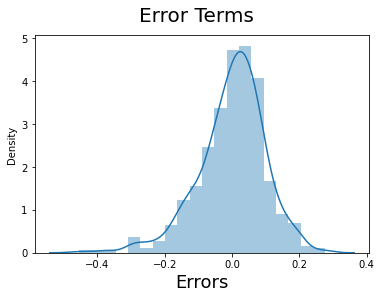

In [54]:
fig = plt.figure()
sns.distplot((y_train-y_train_new),bins=20)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Errors',fontsize = 18)

From above plot we can see that all residuals are normally distributed around 0

#### Making Predictions

In [55]:
# we have to use transform method since it is testing data
num_vars = ['temp','atemp','cnt','hum','windspeed']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [56]:
y_test = bike_test.pop('cnt')
x_test = bike_test

In [57]:
x_test_new = x_test[x_train_new.columns]
x_test_new = sm.add_constant(x_test_new)

In [58]:
# predicting the values based on the final model
y_pred = lr7.predict(x_test_new)

Text(0, 0.5, 'y_pred')

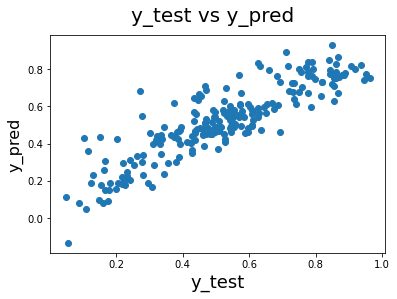

In [59]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7724376516730698

In [61]:
x_test_new.shape

(219, 9)

In [62]:
n = x_test_new.shape[0]
p = x_test_new.shape[1]
r2 = 0.7724376516730698

In [63]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7626383160991829

### Final Results

###### Training set r2 score          - 80.3
###### Training set adjusted r2 score - 80.0
###### Testing set r2 score           - 77.2
###### Testing set adjusted r2 score  - 76.2

##### Equation of best fitted model:

cnt = 0.0872+(yr x 0.2337)+(holiday x -0.0871)+
(temp x 0.5687)+(windspeed x -0.1453)+
(mnth_9 x 0.0891)+(sea_2 x 0.0802)+
(sea_4 x 0.1275)+(wea_3 x -0.2541)
   

##### Interpretation of coeffecients:

###### temp: 
           A unit increase in temperature then bike hire number increases by 0.5687 units

##### wea_3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds):
          A unit increase in wea_3 then bike hire number decreases by 0.2541 units

##### yr:
          A unit increase in yr then bike hire number increases by 0.2337 units

##### holiday:
         A unit increase in holiday then bike hire number decreases by 0.0871 units

##### windspeed:
      A unit increase in windspeed then bike hire number decreases by 0.1453 units

##### mnth_9(September):
      A unit increase in mnth_9 then bike hire number decreases by 0.0891 units

##### sea_2(summer):
      A unit increase in sea_2 then bike hire number decreases by 0.0802 units

##### sea_4 (winter):
      A unit increase in sea_4 then bike hire number decreases by 0.1275 units